In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/US Monthly Air Passengers.csv')

In [ ]:
passenger = df.iloc[: ,:1]
passenger

,Sum_PASSENGERS
0,0
1,0
2,0
3,89
4,108
...,...
1048570,770
1048571,806
1048572,919
1048573,977


In [ ]:
time = df.iloc[: ,-1:]
time

,TIME
0,2015 - 3 - 1
1,2015 - 4 - 1
2,2015 - 3 - 1
3,2015 - 1 - 1
4,2015 - 3 - 1
...,...
1048570,2007 - 5 - 1
1048571,2007 - 6 - 1
1048572,2007 - 7 - 1
1048573,2007 - 8 - 1


In [ ]:
data = pd.concat([time, passenger], axis=1, ignore_index=True, sort=False)
data = pd.DataFrame(data)

In [ ]:
data.head()

,0,1
0,2015 - 3 - 1,0
1,2015 - 4 - 1,0
2,2015 - 3 - 1,0
3,2015 - 1 - 1,89
4,2015 - 3 - 1,108


In [ ]:
data.columns = ['Time','Sum_Passengers']

In [ ]:
data.head()

,Time,Sum_Passengers
0,2015 - 3 - 1,0
1,2015 - 4 - 1,0
2,2015 - 3 - 1,0
3,2015 - 1 - 1,89
4,2015 - 3 - 1,108


In [ ]:
data['Time']=pd.to_datetime(data['Time'])

In [ ]:
data.head()

,Time,Sum_Passengers
0,2015-03-01,0
1,2015-04-01,0
2,2015-03-01,0
3,2015-01-01,89
4,2015-03-01,108


In [ ]:
data=pd.DataFrame(list(data['Sum_Passengers']),index=data.Time,columns=['Sum_Passengers'])

In [ ]:
data.head(20)

,Sum_Passengers
Time,
2015-03-01,0
2015-04-01,0
2015-03-01,0
2015-01-01,89
2015-03-01,108
2015-04-01,83
2015-04-01,16
2015-01-01,475
2015-02-01,444


In [ ]:
data.shape

(1048575, 1)

In [ ]:
data.isna().sum()

Sum_Passengers    0
dtype: int64

In [ ]:
data=data.sort_values(by='Time')
data.head(10)

,Sum_Passengers
Time,
2000-01-01,249
2000-01-01,635
2000-01-01,1953
2000-01-01,1852
2000-01-01,244
2000-01-01,8803
2000-01-01,1846
2000-01-01,24
2000-01-01,4


In [ ]:
data_monthly = data.resample('M').mean()

In [ ]:
data_monthly.head(10)

,Sum_Passengers
Time,
2000-01-31,2945.978110
2000-02-29,3461.334434
2000-03-31,4118.864899
2000-04-30,3739.335219
2000-05-31,4081.359762
2000-06-30,4287.926288
2000-07-31,4511.705081
2000-08-31,4500.101873
2000-09-30,3836.292365


In [ ]:
data_monthly.sample(5)

,Sum_Passengers
Time,
2001-09-30,2642.964626
2003-05-31,3885.324052
2012-12-31,3198.317172
2013-01-31,2914.179585
2006-02-28,3194.016810


In [ ]:
data_monthly.describe()

,Sum_Passengers
count,250.000000
mean,3752.415995
std,644.210469
min,257.845141
25%,3389.026789
50%,3769.539882
75%,4135.740502
max,5120.116659


In [ ]:
data_monthly.isna().sum()

Sum_Passengers    0
dtype: int64

In [ ]:
data_monthly.shape

(250, 1)

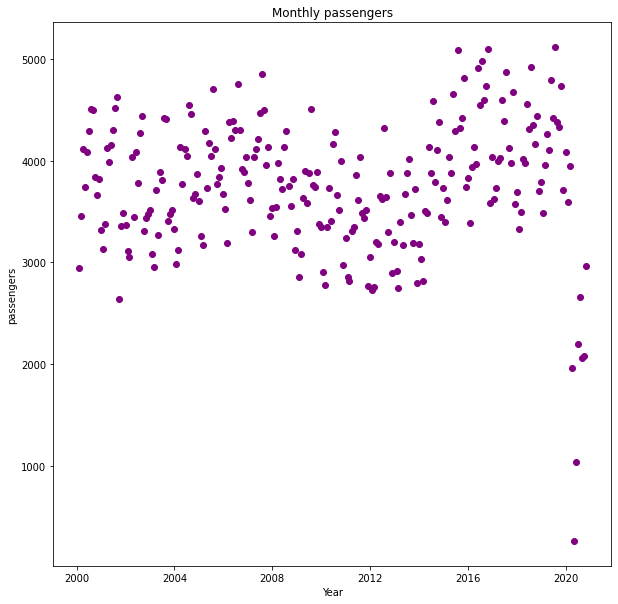

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_monthly.index.values,
           data_monthly['Sum_Passengers'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="passengers",
       title="Monthly passengers")

plt.show()

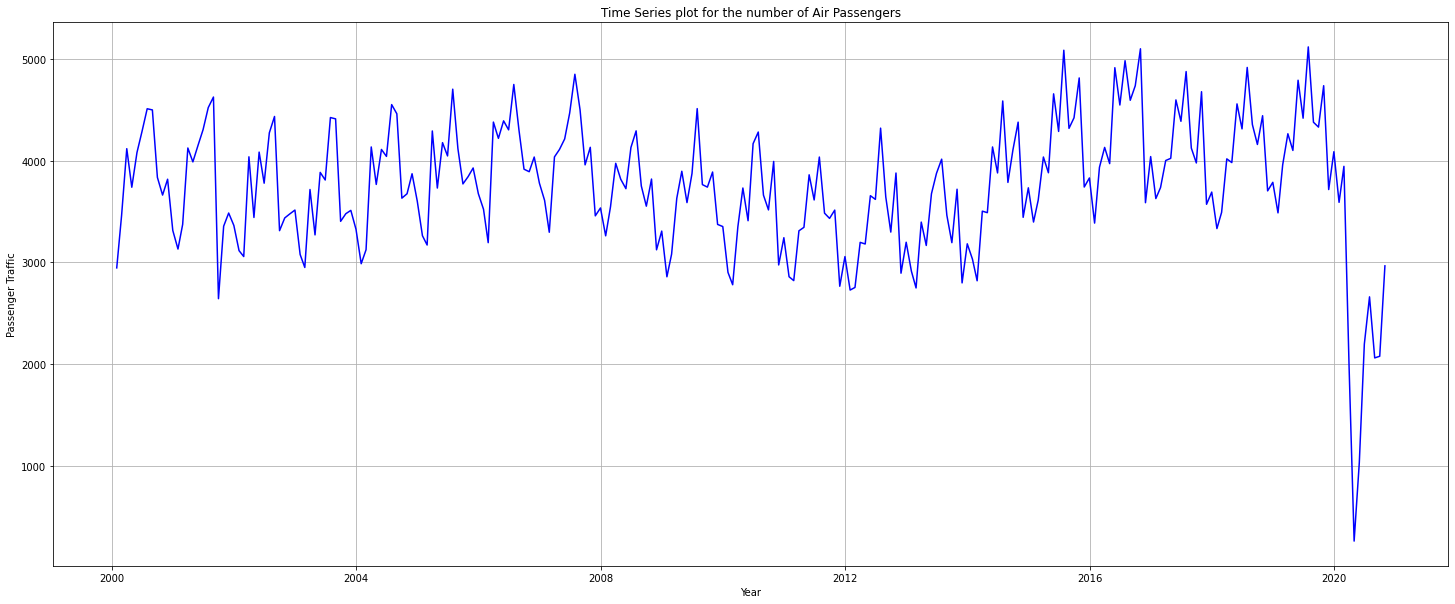

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(data_monthly.index, data_monthly['Sum_Passengers'], color='blue')
plt.xlabel('Year')
plt.ylabel('Passenger Traffic')
plt.title('Time Series plot for the number of Air Passengers')
plt.grid(True)
plt.show()

In [ ]:
rolmean=data_monthly.rolling(window=12).mean()
rolstd=data_monthly.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Sum_Passengers
Time                      
2000-01-31             NaN
2000-02-29             NaN
2000-03-31             NaN
2000-04-30             NaN
2000-05-31             NaN
2000-06-30             NaN
2000-07-31             NaN
2000-08-31             NaN
2000-09-30             NaN
2000-10-31             NaN
2000-11-30             NaN
2000-12-31     3856.474794
2001-01-31     3871.911543
2001-02-28     3864.608367
2001-03-31     3865.159377
            Sum_Passengers
Time                      
2000-01-31             NaN
2000-02-29             NaN
2000-03-31             NaN
2000-04-30             NaN
2000-05-31             NaN
2000-06-30             NaN
2000-07-31             NaN
2000-08-31             NaN
2000-09-30             NaN
2000-10-31             NaN
2000-11-30             NaN
2000-12-31      474.980805
2001-01-31      444.747785
2001-02-28      452.750314
2001-03-31      453.091777


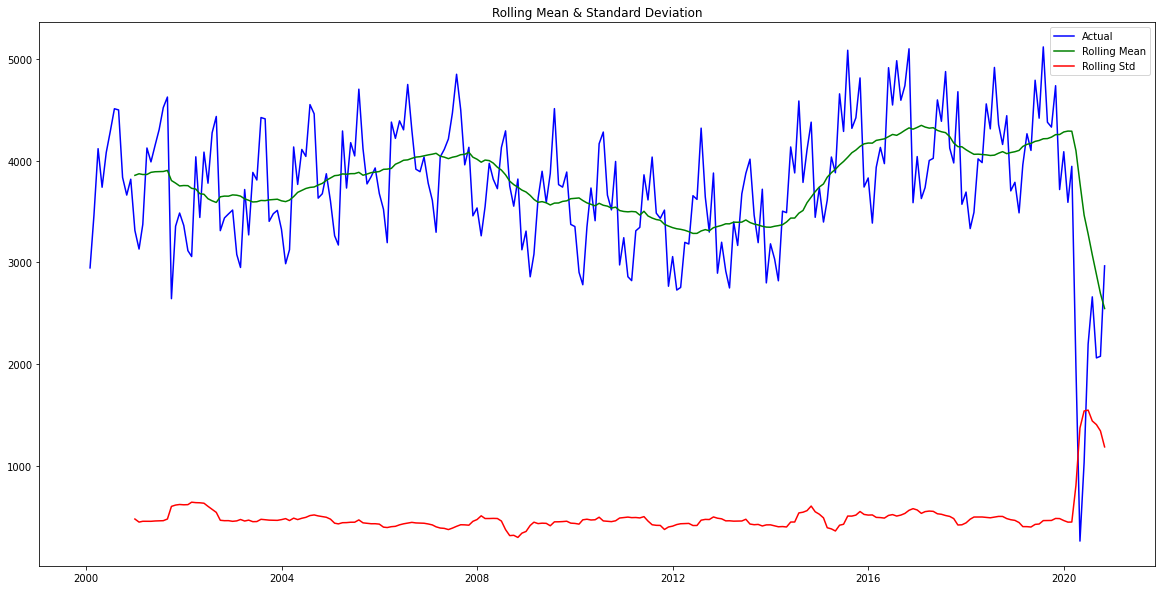

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(data_monthly, color='blue', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='red', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Plotting the Rolling Mean and Standard Deviation, which has window of 12.

By looking the above plot, we conclude that, it is non-stationary as the mean and variance is not constant

**Augmented Dickey Fuller**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        

In [ ]:
check_stationarity(data_monthly)

ADF Statistic: -2.139706
p-value: 0.228851
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
Non-stationary


**Removing Seasonality**

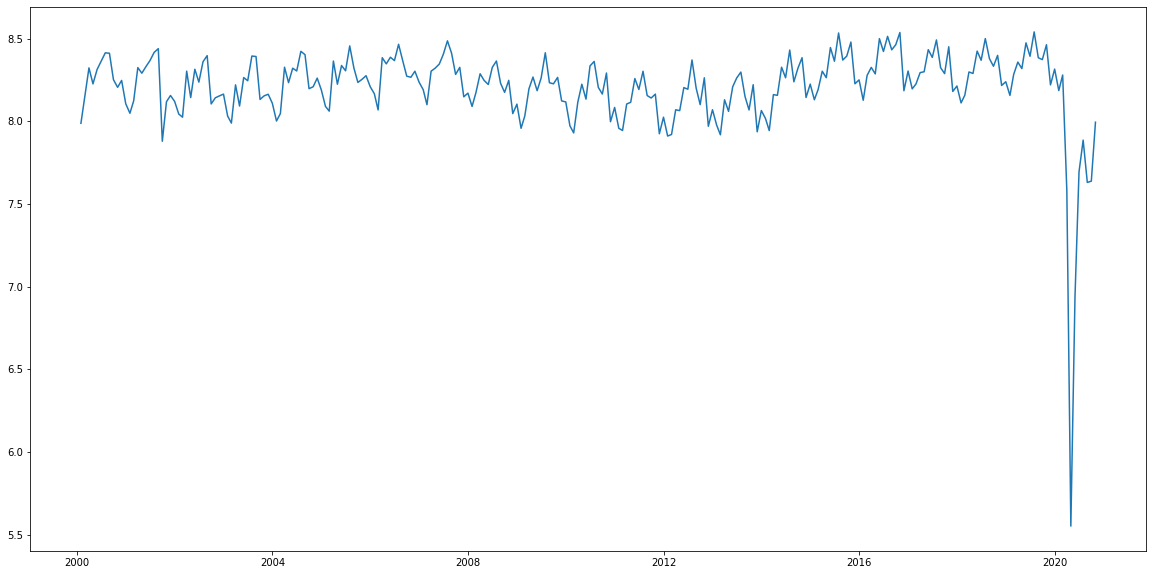

In [ ]:
plt.figure(figsize=(20,10))
data_log=np.log(data_monthly)
plt.plot(data_log)

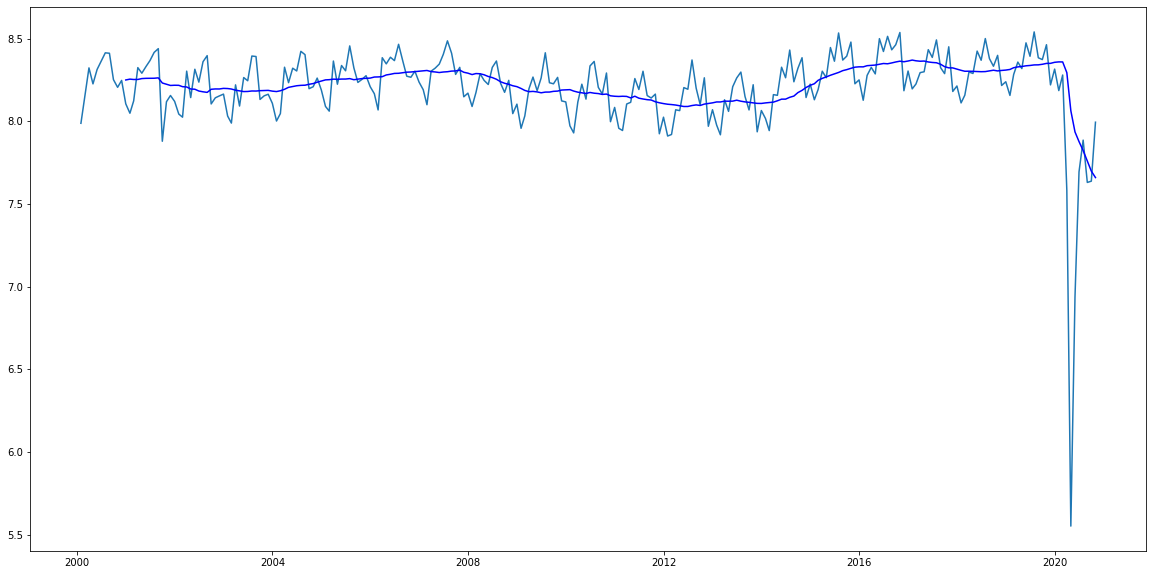

In [ ]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [ ]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Sum_Passengers
Time,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,NaN
2000-05-31,NaN
2000-06-30,NaN
2000-07-31,NaN
2000-08-31,NaN
2000-09-30,NaN


ADF Statistic: -5.396745
p-value: 0.000003
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Stationary


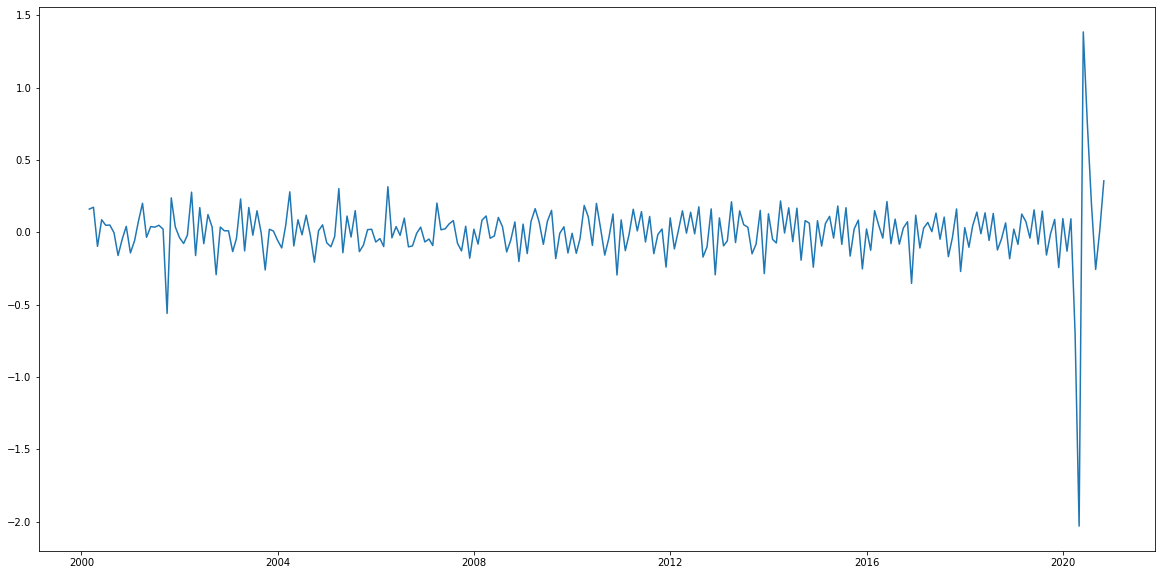

In [ ]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift(2)
plt.plot(data_shift)

data_shift=data_shift.dropna()
check_stationarity(data_shift)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
dc = seasonal_decompose(data_monthly['Sum_Passengers'],model='additive')

In [ ]:
trend = dc.trend
seasonal = dc.seasonal
resid = dc.resid

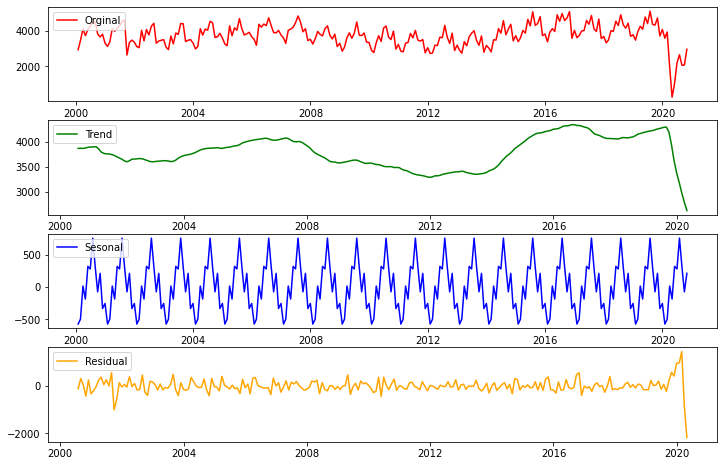

In [ ]:
plt.figure(figsize = (12, 8))

# Observed
plt.subplot(411)
plt.plot(data_monthly['Sum_Passengers'], label = "Orginal", color = "red")
plt.legend(loc = "upper left")

# Trend
plt.subplot(412)
plt.plot(trend, label = "Trend", color = "green")
plt.legend(loc = "upper left")

# Seasonal
plt.subplot(413)
plt.plot(seasonal, label = "Sesonal", color = "blue")
plt.legend(loc = "upper left")

# residual
plt.subplot(414)
plt.plot(resid, label = "Residual", color = "orange")
plt.legend(loc = "upper left")

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


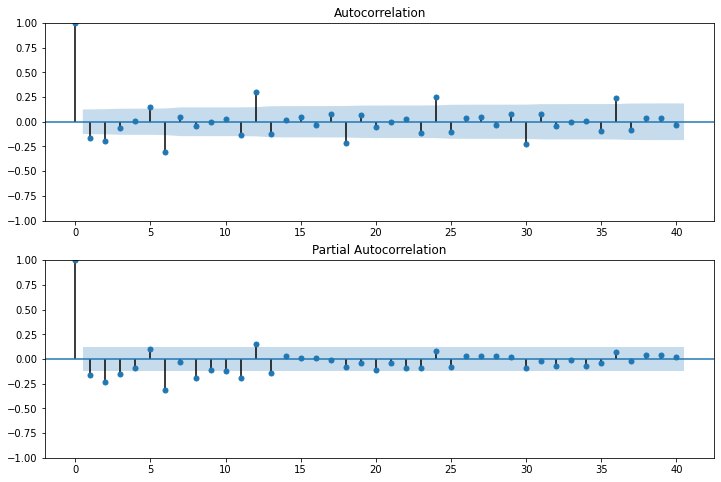

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_shift.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_shift, lags=40, ax=ax2)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima as pm

In [ ]:
from pmdarima.arima import auto_arima

arima_model=auto_arima(data_shift['Sum_Passengers'],start_p=1,d=1,start_q=1,
                       max_p=5,max_q=5,max_d=5,m=12,
                       start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       suppress_warnings=True,
                       stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=55.431, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=20.352, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=19.514, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=19.653, Time=0.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=21.126, Time=0.95 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-20.668, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-20.685, Time=0.58 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-21.012, Time=1.60 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=-19.013, Time=3.41 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=-19.108, Time=8.34 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-20.843, Time=2.94 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=-17.288, Time=20.76 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20

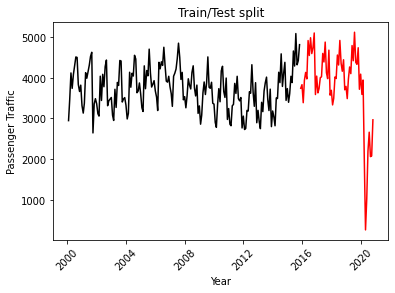

In [ ]:
train =data_monthly[data_monthly.index < pd.to_datetime("2015-11-01", format='%Y-%m-%d')]
test =data_monthly[data_monthly.index > pd.to_datetime("2015-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Passenger Traffic')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train['Sum_Passengers'], order = (5, 1, 0), seasonal_order = (0, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Sum_Passengers   No. Observations:                  190
Model:             SARIMAX(5, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1202.940
Date:                              Fri, 04 Nov 2022   AIC                           2419.881
Time:                                      14:11:09   BIC                           2442.114
Sample:                                  01-31-2000   HQIC                          2428.898
                                       - 10-31-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7359      0.088     -8.356      0.000      -0.908      -0.563
ar.L2         -0.3859      0.116     -3.324      0.001      -0.613      -0.158
ar.L3         -0.3135      0.105     -2.994      0.003      -0.519      -0.108
ar.L4         -0.1605      0.105     -1.528      0.127      -0.366       0.045
ar.L5         -0.0709      0.078     -0.904      0.366      -0.225       0.083
ma.S.L12      -0.4778      0.080     -5.973      0.000      -0.635      -0.321
sigma2      4.531e+04   3846.169     11.780      0.000    3.78e+04    5.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               174.55
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.98
Prob(H) (two-sided):                  0.06   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_range1 = result.predict(0, len(train)-1)
prediction_range1

Time
2000-01-31       0.000000
2000-02-29    2875.903988
2000-03-31    3457.207787
2000-04-30    4078.702770
2000-05-31    3768.170048
                 ...     
2015-06-30    4461.316241
2015-07-31    4980.263006
2015-08-31    4257.472166
2015-09-30    4373.457527
2015-10-31    4717.259692
Freq: M, Name: predicted_mean, Length: 190, dtype: float64

In [ ]:
prediction_range2 = result.predict(len(train), (len(data_monthly)-1))
prediction_range2

2015-11-30    3851.833946
2015-12-31    4155.313536
2016-01-31    3876.181218
2016-02-29    3917.738741
2016-03-31    4443.062899
2016-04-30    4336.103298
2016-05-31    4997.148645
2016-06-30    4768.458588
2016-07-31    5437.900021
2016-08-31    4702.128939
2016-09-30    4779.163972
2016-10-31    5157.888189
2016-11-30    4215.622212
2016-12-31    4521.373516
2017-01-31    4238.767418
2017-02-28    4279.570629
2017-03-31    4803.707863
2017-04-30    4697.171444
2017-05-31    5358.996278
2017-06-30    5130.308759
2017-07-31    5799.558786
2017-08-31    5063.699396
2017-09-30    5140.717397
2017-10-31    5519.492577
2017-11-30    4577.253892
2017-12-31    4882.998526
2018-01-31    4600.379818
2018-02-28    4641.179355
2018-03-31    5165.318258
2018-04-30    5058.785118
2018-05-31    5720.610544
2018-06-30    5491.922284
2018-07-31    6161.171592
2018-08-31    5425.312187
2018-09-30    5502.330382
2018-10-31    5881.105727
2018-11-30    4938.867018
2018-12-31    5244.611598
2019-01-31  

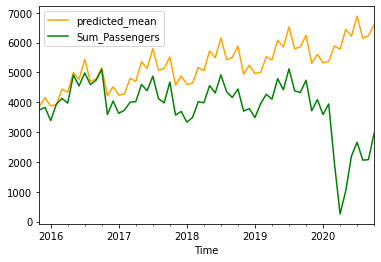

In [ ]:
prediction_range2.plot(legend = True, color = "orange")
test['Sum_Passengers'].plot(legend = True, color = "green")

In [ ]:
len(data_monthly)

250

In [ ]:
forecast = result.predict(start = len(data_monthly), end = (len(data_monthly) - 1) + 5 * 12, typ = "levels").rename("Forecast")

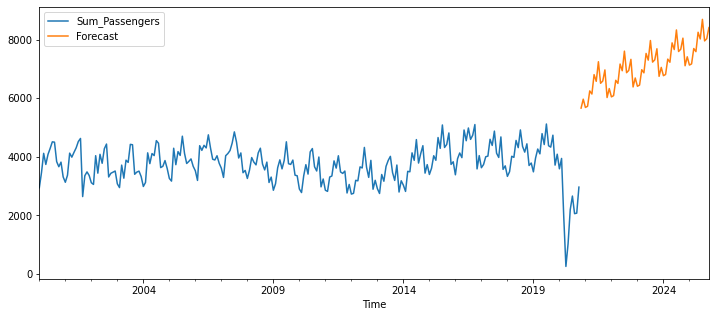

In [ ]:
data_monthly['Sum_Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)